# Short Circuit 1D/2D Model

In [1]:
import pandas as pd
# %matplotlib inline
import matplotlib.pyplot as plt

# Sample 2D Surface

I created a 220ft wide cross section, and then extrude it using a 2% slope to form a surface.

Below is the cross section.

In [2]:
f = r"C:\Users\Mel.Meng\Documents\GitHub\xpswmm\models\short_circuit\data\cross section.xlsx"
df = pd.read_excel(f)

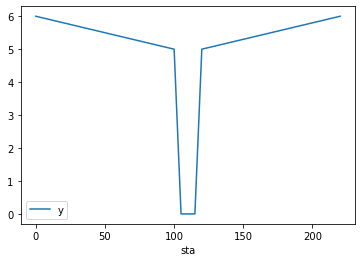

In [3]:
df.plot(x='sta', y='y')

In [4]:
points = []
for l in range(0, 500, 10):
    for i, r in df.iterrows():
        x = r['sta']
        z = r['y'] + l*0.02
        y = l
        points.append([x, y, z])
        
surface = pd.DataFrame(points, columns=['x', 'y', 'z'])
surface.to_csv(r"C:\Users\Mel.Meng\Documents\GitHub\xpswmm\models\short_circuit\data\surface.csv", index=False)
    

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(surface.x.values)
y = np.array(surface.y.values)
z = np.array(surface.z.values)
ax.plot_trisurf(x, y, z, color='b')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Overlay a 1D channel

Now let's see if we model the middel channel as a 1D channel, and overlay them together. What if we got the inverts wrong for the channel, and part of it is higher than the bank, and part of it is lower than the bank.

In [12]:
points = []
for l in range(0, 500, 10):
    for i, r in df.iterrows():
        x = r['sta']
        if x < 120 and x > 100:
            z = 24/500.0*l-2
        else:
            z = r['y'] + l*0.02
        if x == 120:
            
            z = 24/500.0*l-2 + r['y']
            points.append([x, y, z])
            z = r['y'] + l*0.02
            points.append([x + 0.1, y, z])
            continue
        if x == 100:
            z = r['y'] + l*0.02
            points.append([x -0.1, y, z])
            z = 24/500.0*l-2 + r['y']
            points.append([x, y, z])
            continue
        y = l
        points.append([x, y, z])
        
surface = pd.DataFrame(points, columns=['x', 'y', 'z'])
surface.to_csv(r"C:\Users\Mel.Meng\Documents\GitHub\xpswmm\models\short_circuit\data\surface_wrong.csv", index=False)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(surface.x.values)
y = np.array(surface.y.values)
z = np.array(surface.z.values)
ax.plot_trisurf(x, y, z, color='b')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …